In [18]:







import numpy as np 
import pandas as pd
import sqlite3

In [1]:
!pip install tweetpy

ERROR: Could not find a version that satisfies the requirement tweetpy (from versions: none)
ERROR: No matching distribution found for tweetpy
You should consider upgrading via the 'c:\python39\python.exe -m pip install --upgrade pip' command.


In [1]:
import tweepy as tw
# your Twitter API key and API secret
my_api_key = "bMfedYl71b13lvSRp0Ufzse3y"
my_api_secret = "qjs9Ei32da60uNzsSVxRglF6jnozsi6HB0lhNm4GzTx98CvA31"
# authenticate
auth = tw.OAuthHandler(my_api_key, my_api_secret)
api = tw.API(auth, wait_on_rate_limit=True)

In [4]:
search_query = 'amk aq'

tweets = tw.Cursor(api.search_tweets,
              q=search_query,
              lang="tr").items(3000)
# store the API responses in a list
tweets_copy = []
for tweet in tweets:
    tweets_copy.append(tweet)
    
print("Total Tweets fetched:", len(tweets_copy))

Total Tweets fetched: 2819


In [9]:
import json
my_list_of_dicts = []
for each_json_tweet in tweets_copy:
    my_list_of_dicts.append(each_json_tweet._json)


with open('tweet_json.txt', 'w') as file:
        file.write(json.dumps(my_list_of_dicts, indent=4))

In [6]:
import pandas as pd
import os
tweets_df = pd.DataFrame()
# populate the dataframe
json_data = [r._json for r in tweets_copy]

tweetdf = pd.json_normalize(json_data)

In [7]:
tweetdf

,created_at,id,id_str,text,truncated,source,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,...,place.name,place.full_name,place.country_code,place.country,place.contained_within,place.bounding_box.type,place.bounding_box.coordinates,retweeted_status.entities.media,retweeted_status.extended_entities.media,quoted_status.scopes.followers
0,Wed May 18 21:53:01 +0000 2022,1527044613961306114,1527044613961306114,@AdomelBTS @mrsslavinia Ay siz kafayı yemissin...,True,"<a href=""http://twitter.com/download/android"" ...",1.527025e+18,1527025319839940615,1.303280e+18,1303280223040016385,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Wed May 18 21:52:29 +0000 2022,1527044477952610322,1527044477952610322,PENALTI ATMAK İÇİN OYUNA ALINAN TOPÇUNUN KAÇIR...,False,"<a href=""http://twitter.com/download/iphone"" r...",NaN,None,NaN,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Wed May 18 21:52:22 +0000 2022,1527044450723188739,1527044450723188739,Bakın erkekler şu bu fotoğrafları kızlara göst...,False,"<a href=""http://twitter.com/download/android"" ...",NaN,None,NaN,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Wed May 18 21:47:40 +0000 2022,1527043265131839492,1527043265131839492,annem beni tutup nehir korkuyorum diyor ANNE S...,True,"<a href=""http://twitter.com/download/android"" ...",NaN,None,NaN,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Wed May 18 21:37:53 +0000 2022,1527040805810147330,1527040805810147330,YAV O MADISON BEER IN AMK SABAHTANDIR BU TWİT ...,False,"<a href=""http://twitter.com/download/iphone"" r...",NaN,None,NaN,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2814,Tue May 10 16:01:22 +0000 2022,1524057014573412354,1524057014573412354,hybein btsi sadece para icin kullanmasi cok ig...,True,"<a href=""http://twitter.com/download/android"" ...",NaN,None,NaN,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2815,Tue May 10 16:00:36 +0000 2022,1524056823300567040,1524056823300567040,Aq cd mi kaldı yaa ben o cdyi alsam takacak bi...,False,"<a href=""http://twitter.com/download/iphone"" r...",NaN,None,NaN,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2816,Tue May 10 15:59:46 +0000 2022,1524056612641644544,1524056612641644544,RT @Arthurdaviddo: Nisa bugün çıkıp deseki çek...,False,"<a href=""http://twitter.com/download/iphone"" r...",NaN,None,NaN,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2817,Tue May 10 15:54:00 +0000 2022,1524055158904213506,1524055158904213506,Amk pastanecisinden 3 tane simit aldım 6 TL tu...,True,"<a href=""http://twitter.com/download/android"" ...",NaN,None,NaN,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
lastdf = tweetdf[['text']]
lastdf

,text
0,@AdomelBTS @mrsslavinia Ay siz kafayı yemissin...
1,PENALTI ATMAK İÇİN OYUNA ALINAN TOPÇUNUN KAÇIR...
2,Bakın erkekler şu bu fotoğrafları kızlara göst...
3,annem beni tutup nehir korkuyorum diyor ANNE S...
4,YAV O MADISON BEER IN AMK SABAHTANDIR BU TWİT ...
...,...
2814,hybein btsi sadece para icin kullanmasi cok ig...
2815,Aq cd mi kaldı yaa ben o cdyi alsam takacak bi...
2816,RT @Arthurdaviddo: Nisa bugün çıkıp deseki çek...
2817,Amk pastanecisinden 3 tane simit aldım 6 TL tu...


In [10]:
lastdf["sentiment"] = 2
lastdf

C:\Users\Cemal\AppData\Local\Temp/ipykernel_14204/3427107795.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lastdf["sentiment"] = 2


,text,sentiment
0,@AdomelBTS @mrsslavinia Ay siz kafayı yemissin...,2
1,PENALTI ATMAK İÇİN OYUNA ALINAN TOPÇUNUN KAÇIR...,2
2,Bakın erkekler şu bu fotoğrafları kızlara göst...,2
3,annem beni tutup nehir korkuyorum diyor ANNE S...,2
4,YAV O MADISON BEER IN AMK SABAHTANDIR BU TWİT ...,2
...,...,...
2814,hybein btsi sadece para icin kullanmasi cok ig...,2
2815,Aq cd mi kaldı yaa ben o cdyi alsam takacak bi...,2
2816,RT @Arthurdaviddo: Nisa bugün çıkıp deseki çek...,2
2817,Amk pastanecisinden 3 tane simit aldım 6 TL tu...,2


In [13]:
lastdf.reset_index(drop=True,inplace = True)

In [14]:
lastdf

,text,sentiment
0,@AdomelBTS @mrsslavinia Ay siz kafayı yemissin...,2
1,PENALTI ATMAK İÇİN OYUNA ALINAN TOPÇUNUN KAÇIR...,2
2,Bakın erkekler şu bu fotoğrafları kızlara göst...,2
3,annem beni tutup nehir korkuyorum diyor ANNE S...,2
4,YAV O MADISON BEER IN AMK SABAHTANDIR BU TWİT ...,2
...,...,...
2814,hybein btsi sadece para icin kullanmasi cok ig...,2
2815,Aq cd mi kaldı yaa ben o cdyi alsam takacak bi...,2
2816,RT @Arthurdaviddo: Nisa bugün çıkıp deseki çek...,2
2817,Amk pastanecisinden 3 tane simit aldım 6 TL tu...,2


In [15]:
lastdf.to_csv('test_data.csv')

In [33]:
test_data = pd.read_csv("test_data.csv",index_col=0)
test_data.reset_index(level = 0,drop=True,inplace = True)
test_data

,text,sentiment
0,@AdomelBTS @mrsslavinia Ay siz kafayı yemissin...,2
1,PENALTI ATMAK İÇİN OYUNA ALINAN TOPÇUNUN KAÇIR...,2
2,Bakın erkekler şu bu fotoğrafları kızlara göst...,2
3,annem beni tutup nehir korkuyorum diyor ANNE S...,2
4,YAV O MADISON BEER IN AMK SABAHTANDIR BU TWİT ...,2
...,...,...
2814,hybein btsi sadece para icin kullanmasi cok ig...,2
2815,Aq cd mi kaldı yaa ben o cdyi alsam takacak bi...,2
2816,RT @Arthurdaviddo: Nisa bugün çıkıp deseki çek...,2
2817,Amk pastanecisinden 3 tane simit aldım 6 TL tu...,2


C:\Users\Cemal\AppData\Local\Temp/ipykernel_5476/825707450.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['label'][key] = "Olumlu"
c:\Python39\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\Cemal\AppData\Local\Temp/ipykernel_5476/1738147678.py:22: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['text'] = df['text'].str.replace(char, ' ')
C:\Users\Cem

,text,sentiment
0,enerji konusunda belli tasarım başarılı oldukç...,1
1,fenerbahçe büyüklüğü besincilikle altincilikla...,1
2,ses kalitesi iyi,1
3,filmin ifadesine begendim simgesini koymaya iç...,0
4,kesinlikle birdaha siteden sipariş vermiycem a...,0
...,...,...
22065,kötü yazik hakediyor izledigime pisman oldum,0
22066,hizli teslimat super urun cok memnunum,1
22067,taksime yolunuz düşerse kavuşmadurağı bekliyor...,1
22068,konuda bigi almak istiyorum kot kumaş dikiyom...,0


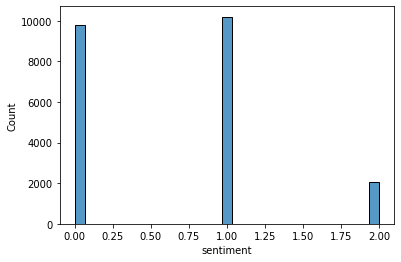

In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import sqlite3
file1 = "./datasets/magaza_yorumlari_duygu_analizi.csv"
file2 = "./datasets/turkish_tweets_2020.csv"


df1 = pd.read_csv("../datasets/magaza_yorumlari_duygu_analizi.csv",encoding="utf-16")
df2 = pd.read_csv("../datasets/turkish_tweets_2020.csv",encoding="utf-8")
df1.isna().value_counts()
df1 = df1.dropna()
df1.loc[(df1.Durum == 'Tarafsız'),'Durum']='Olumlu'
df2.isna().value_counts()
key = 0
for i in df2['label']:
    
    if i == 0:
        df2['label'][key] = "Olumlu"
    elif i == 1:
        df2['label'][key] = "Kufurlu"
    key+=1 

df1_new1 = df1.rename(columns={'Görüş': 'text','Durum':'label'})

df1_new1.head
result = pd.concat([df1_new1,df2],axis=0)
result.reset_index(drop=True,inplace = True)
result = result.sample(frac = 1)
result.reset_index(drop=True,inplace = True)
result.loc[:,'sentiment'] = result.label.map({'Olumsuz':0,'Olumlu':1,'Kufurlu':2})
result = result.drop(['label'],axis = 1)
extra_1 = pd.read_csv("../datasets/magaza_yorumlari_short.csv")
extra_2 = pd.read_csv("../datasets/film_yorumlari.csv",index_col=[0],encoding="windows-1252")
extra_3 = pd.read_csv("../datasets/film_yorumlari_2.csv",index_col=[0],encoding="windows-1252")
extra_1 = extra_1.rename(columns={'Yorum': 'text','Duygu':'sentiment'})
extra_2 = extra_2.rename(columns={'comment': 'text','Label':'sentiment'})
extra_3 = extra_3.rename(columns={'comment': 'text','Label':'sentiment'})
df_extra = pd.concat([extra_1,extra_2,extra_3],axis=0)
df_extra = df_extra[df_extra["sentiment"] == 0]
result = pd.concat([result,df_extra],axis=0)
result = result.sample(frac = 1)
result.reset_index(drop=True,inplace = True)
sns.histplot(result['sentiment'])

df = result
prep = Preprocessmaker(df)
df = prep.preprocess(df)
df

In [1]:
import psycopg2
import datetime
#establishing the connection

def addEmbedding():
   conn = psycopg2.connect(
      database="MyDataBase", user='postgres', password='123321', host='127.0.0.1', port= '5432'
   )
   #Creating a cursor object using the cursor() method
   cur = conn.cursor()
   sql = ''' INSERT INTO dbo."Embeddings"(text,prediction_sentiment,actual_sentiment,\"isTrained",\"createdOn",\"isActive")
               VALUES(%s,%s,%s,%s,%s,%s) '''
   createdOn = datetime.datetime.today()
   count = 0
   for data in df.values:
      first_entry = (data[0],data[1],data[1],True,createdOn,True)
      cur.execute(sql, first_entry)
      conn.commit()
      count = count + 1
      if count % 1000 == 0:
         print("1000 adet veri eklendi")

   conn.close()

#first_entry = ("bu bir deneme",1,1,False,createdOn,True)
#cur.execute(sql, first_entry)
#conn.commit()
#Executing an MYSQL function using the execute() method

#cur.execute("""SELECT text,actual_sentiment FROM dbo."Embeddings" ORDER BY embedding_id ASC""")



# Fetch a single row using fetchone() method.
#data = cur.fetchall()
#print("Connection established to: ",data)

#Closing the connection


In [19]:
import psycopg2

conn = psycopg2.connect(
    database="MyDataBase", user='postgres', password='123321', host='127.0.0.1', port= '5432'
)
cur = conn.cursor()
sql = ''' SELECT \"modelName",type,\"Accuracy","loss","batch_size","epoch","maxlen",\"createdOn" FROM dbo."Models"  '''
cur.execute(sql)
data = cur.fetchall()
print(data)
conn.close()

[('base-Bert', 'bert', 0.86413044, 0.34987763, 32, 5, 100, datetime.datetime(2022, 5, 17, 20, 38, 31, 753463)), ('base-Custom', 'custom', 0.8544686, 0.3222561, 64, 8, 100, datetime.datetime(2022, 5, 17, 20, 38, 31, 753495)), ('19-5-2022-19.55-Custom', 'custom', 0.44427666, 0.5635679, 64, 1, 100, datetime.datetime(2022, 5, 19, 19, 56, 50, 118194))]


In [20]:
import psycopg2

conn = psycopg2.connect(
    database="MyDataBase", user='postgres', password='123321', host='127.0.0.1', port= '5432'
)
#Creating a cursor object using the cursor() method
cur = conn.cursor()

sqlQuery = pd.read_sql_query("""SELECT text,actual_sentiment FROM dbo."Embeddings" ORDER BY embedding_id ASC""",conn)
sqldf = pd.DataFrame(sqlQuery)
sqldf.rename(columns={'actual_sentiment':'sentiment'},inplace=True)
sqldf.head
conn.close()


In [21]:
sqldf.head()

,text,sentiment
0,enerji konusunda belli tasarım başarılı oldukç...,1
1,fenerbahçe büyüklüğü besincilikle altincilikla...,1
2,ses kalitesi iyi,1
3,filmin ifadesine begendim simgesini koymaya iç...,0
4,kesinlikle birdaha siteden sipariş vermiycem a...,0


In [164]:
test_data = pd.read_csv("../datasets/archive/train.txt", header=None, sep=";", names=["Comment","Emotion"], encoding="utf-8")
test_data

,Comment,Emotion
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger
...,...,...
15995,i just had a very brief time in the beanbag an...,sadness
15996,i am now turning and i feel pathetic that i am...,sadness
15997,i feel strong and good overall,joy
15998,i feel like this was such a rude comment and i...,anger


In [165]:
test_data = test_data.rename(columns={'Comment': 'text','Emotion':'sentiment'})
test_data

,text,sentiment
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger
...,...,...
15995,i just had a very brief time in the beanbag an...,sadness
15996,i am now turning and i feel pathetic that i am...,sadness
15997,i feel strong and good overall,joy
15998,i feel like this was such a rude comment and i...,anger


In [166]:
test_data.loc[:,'sentiment'] = test_data.sentiment.map({'sadness':2,'anger':2,'love':2,'suprise':2,'fear':2,'joy':2})
test_data

,text,sentiment
0,i didnt feel humiliated,2.0
1,i can go from feeling so hopeless to so damned...,2.0
2,im grabbing a minute to post i feel greedy wrong,2.0
3,i am ever feeling nostalgic about the fireplac...,2.0
4,i am feeling grouchy,2.0
...,...,...
15995,i just had a very brief time in the beanbag an...,2.0
15996,i am now turning and i feel pathetic that i am...,2.0
15997,i feel strong and good overall,2.0
15998,i feel like this was such a rude comment and i...,2.0


In [34]:
test_data = test_data.dropna()
test_data

,text,sentiment
0,@AdomelBTS @mrsslavinia Ay siz kafayı yemissin...,2
1,PENALTI ATMAK İÇİN OYUNA ALINAN TOPÇUNUN KAÇIR...,2
2,Bakın erkekler şu bu fotoğrafları kızlara göst...,2
3,annem beni tutup nehir korkuyorum diyor ANNE S...,2
4,YAV O MADISON BEER IN AMK SABAHTANDIR BU TWİT ...,2
...,...,...
2814,hybein btsi sadece para icin kullanmasi cok ig...,2
2815,Aq cd mi kaldı yaa ben o cdyi alsam takacak bi...,2
2816,RT @Arthurdaviddo: Nisa bugün çıkıp deseki çek...,2
2817,Amk pastanecisinden 3 tane simit aldım 6 TL tu...,2


In [35]:
test_data = test_data.astype({"sentiment": int}, errors='raise')
test_data.reset_index(drop=True,inplace = True)
test_data 

,text,sentiment
0,@AdomelBTS @mrsslavinia Ay siz kafayı yemissin...,2
1,PENALTI ATMAK İÇİN OYUNA ALINAN TOPÇUNUN KAÇIR...,2
2,Bakın erkekler şu bu fotoğrafları kızlara göst...,2
3,annem beni tutup nehir korkuyorum diyor ANNE S...,2
4,YAV O MADISON BEER IN AMK SABAHTANDIR BU TWİT ...,2
...,...,...
2814,hybein btsi sadece para icin kullanmasi cok ig...,2
2815,Aq cd mi kaldı yaa ben o cdyi alsam takacak bi...,2
2816,RT @Arthurdaviddo: Nisa bugün çıkıp deseki çek...,2
2817,Amk pastanecisinden 3 tane simit aldım 6 TL tu...,2


In [37]:
test_data['length'] = test_data.text.str.len()
test_data

,text,sentiment,length
0,@AdomelBTS @mrsslavinia Ay siz kafayı yemissin...,2,140
1,PENALTI ATMAK İÇİN OYUNA ALINAN TOPÇUNUN KAÇIR...,2,110
2,Bakın erkekler şu bu fotoğrafları kızlara göst...,2,123
3,annem beni tutup nehir korkuyorum diyor ANNE S...,2,139
4,YAV O MADISON BEER IN AMK SABAHTANDIR BU TWİT ...,2,94
...,...,...,...
2814,hybein btsi sadece para icin kullanmasi cok ig...,2,140
2815,Aq cd mi kaldı yaa ben o cdyi alsam takacak bi...,2,103
2816,RT @Arthurdaviddo: Nisa bugün çıkıp deseki çek...,2,140
2817,Amk pastanecisinden 3 tane simit aldım 6 TL tu...,2,140


In [38]:
test_data = test_data[test_data.length > 80]
test_data = test_data.drop(['length'],axis=1)
test_data = test_data.astype({"sentiment": int,"text":str}, errors='raise')
test_data

,text,sentiment
0,@AdomelBTS @mrsslavinia Ay siz kafayı yemissin...,2
1,PENALTI ATMAK İÇİN OYUNA ALINAN TOPÇUNUN KAÇIR...,2
2,Bakın erkekler şu bu fotoğrafları kızlara göst...,2
3,annem beni tutup nehir korkuyorum diyor ANNE S...,2
4,YAV O MADISON BEER IN AMK SABAHTANDIR BU TWİT ...,2
...,...,...
2814,hybein btsi sadece para icin kullanmasi cok ig...,2
2815,Aq cd mi kaldı yaa ben o cdyi alsam takacak bi...,2
2816,RT @Arthurdaviddo: Nisa bugün çıkıp deseki çek...,2
2817,Amk pastanecisinden 3 tane simit aldım 6 TL tu...,2


In [39]:
test_data= test_data.sample(frac = 1)
test_data.reset_index(drop=True,inplace = True)

In [40]:
df = pd.concat([test_data,sqldf],axis=0)
df

,text,sentiment
0,bu Türk müzik sanatçılarını anlamıyorum anladı...,2
1,RT @LuckyBesta: Olm fener bi şampiyon olsa ali...,2
2,@iamroxher @julesbisiklet harbiden bu ne amk y...,2
3,@TSerdarSx Ya ne abartması amk ya 10 haftadır ...,2
4,@corleoneqpp Kanka arada bir de kazansın ama a...,2
...,...,...
22065,kötü yazik hakediyor izledigime pisman oldum,0
22066,hizli teslimat super urun cok memnunum,1
22067,taksime yolunuz düşerse kavuşmadurağı bekliyor...,1
22068,konuda bigi almak istiyorum kot kumaş dikiyom...,0


In [41]:
df = df.sample(frac = 1)
df.reset_index(drop=True,inplace = True)
df

,text,sentiment
0,helena bonham carter tim burton deil kardesini...,0
1,gerçkten puanina bakip aldanmayin puani nasil ...,0
2,jim carreye yakismayan film senaryo kadadar mü...,0
3,hayret sey michael haneke durup dururken holly...,0
4,urun günler gecti hâlâ elime ulaşmadı,0
...,...,...
24394,evet kesinlikle güzel paslanmaz,1
24395,basit kuruluma sahip sozde cihaz saat ugrasmam...,0
24396,@kumarbaz4141 Oha. Gözümün önündeki olayı görm...,2
24397,memnun kalmadım orijinal samsung marka değildi...,0


<AxesSubplot:xlabel='sentiment', ylabel='Count'>

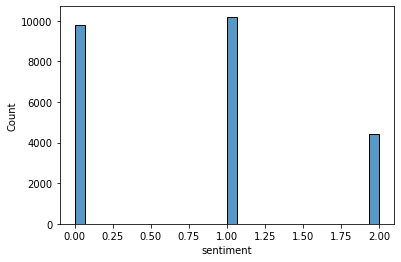

In [43]:
import seaborn as sns
sns.histplot(df['sentiment'])

C:\Users\Cemal\AppData\Local\Temp/ipykernel_14204/1738147678.py:22: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['text'] = df['text'].str.replace(char, ' ')
C:\Users\Cemal\AppData\Local\Temp/ipykernel_14204/1738147678.py:22: FutureWarning: The default value of regex will change from True to False in a future version.
  df['text'] = df['text'].str.replace(char, ' ')


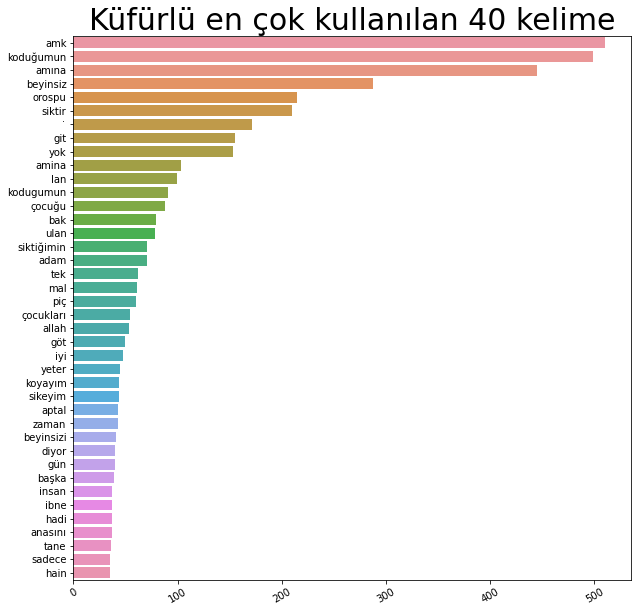

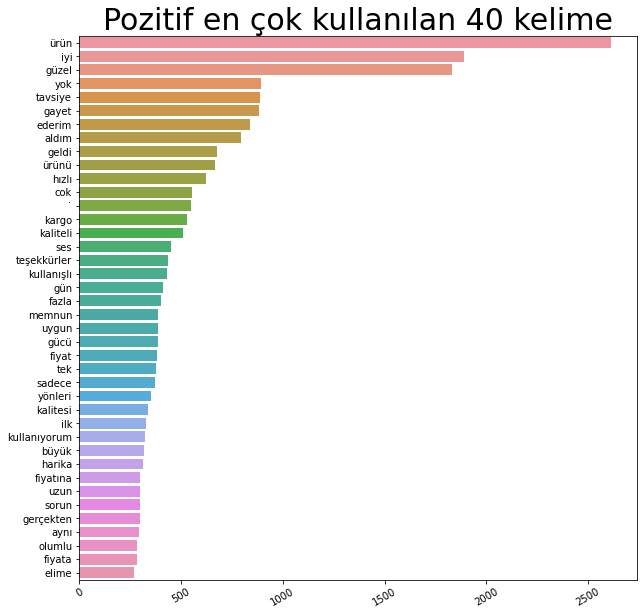

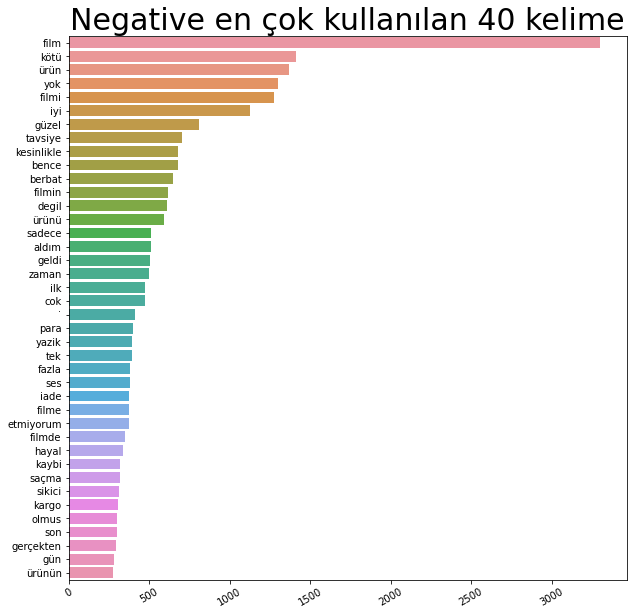

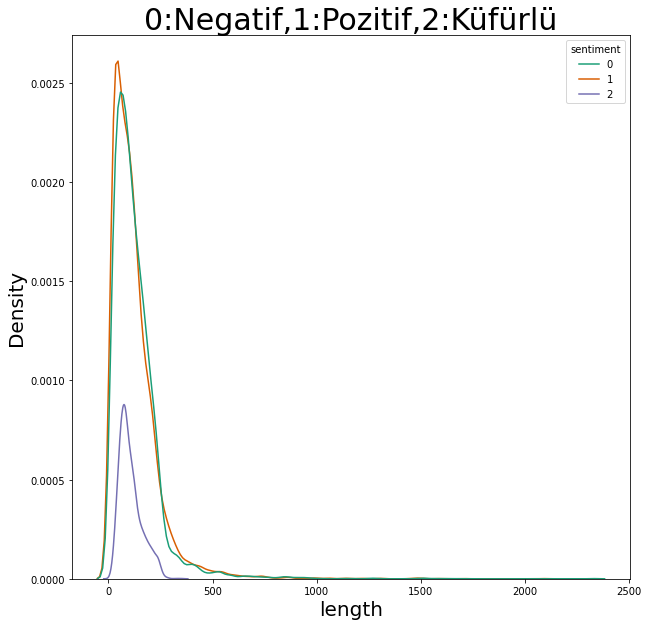

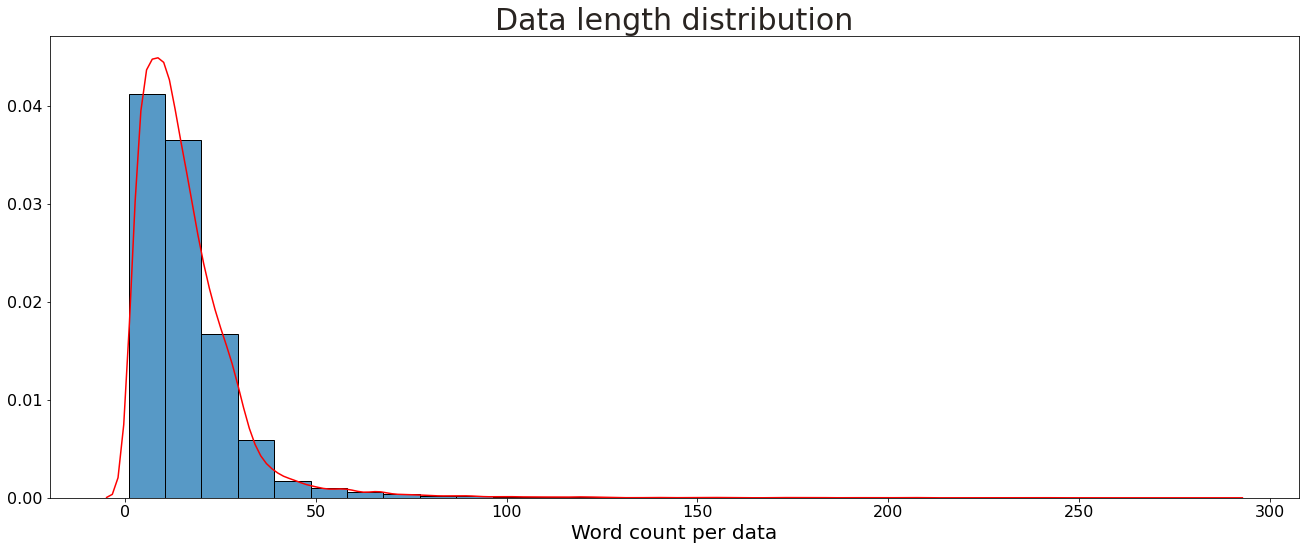

In [50]:
draw2Vec(sqldf,1)

C:\Users\Cemal\AppData\Local\Temp/ipykernel_14204/1738147678.py:22: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['text'] = df['text'].str.replace(char, ' ')
C:\Users\Cemal\AppData\Local\Temp/ipykernel_14204/1738147678.py:22: FutureWarning: The default value of regex will change from True to False in a future version.
  df['text'] = df['text'].str.replace(char, ' ')


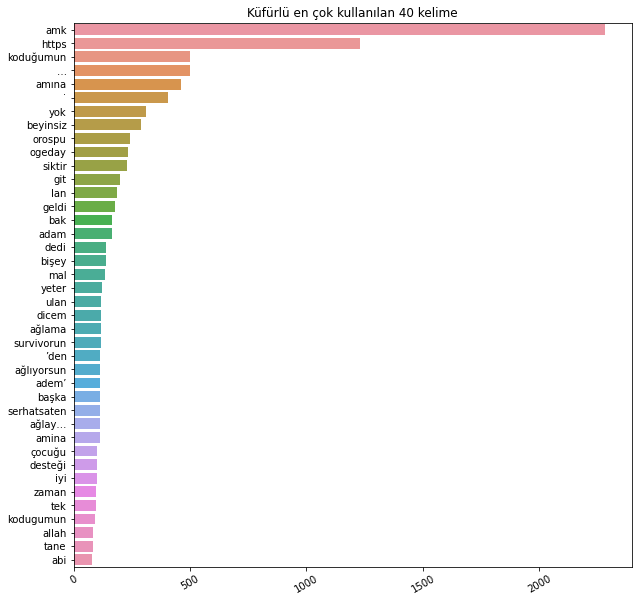

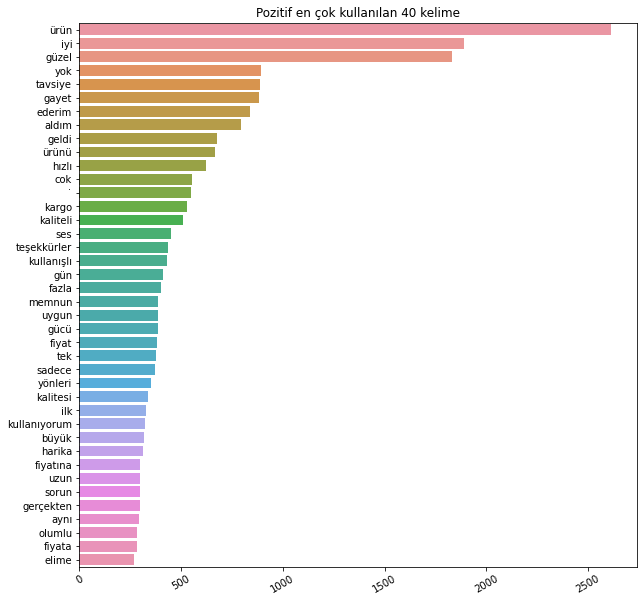

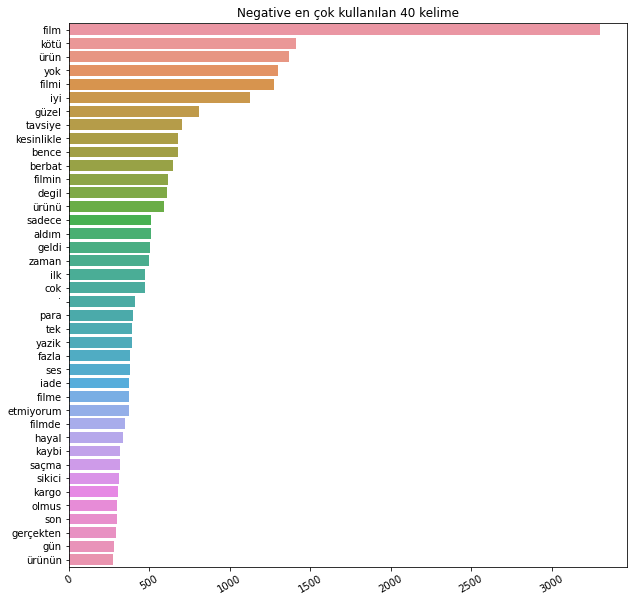

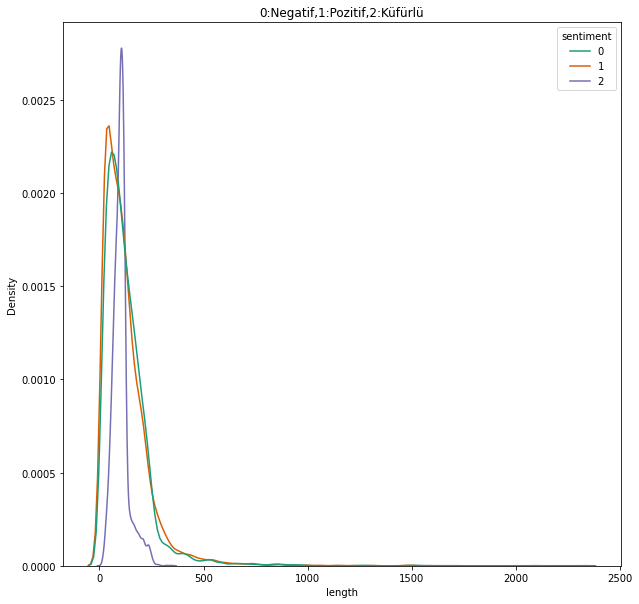

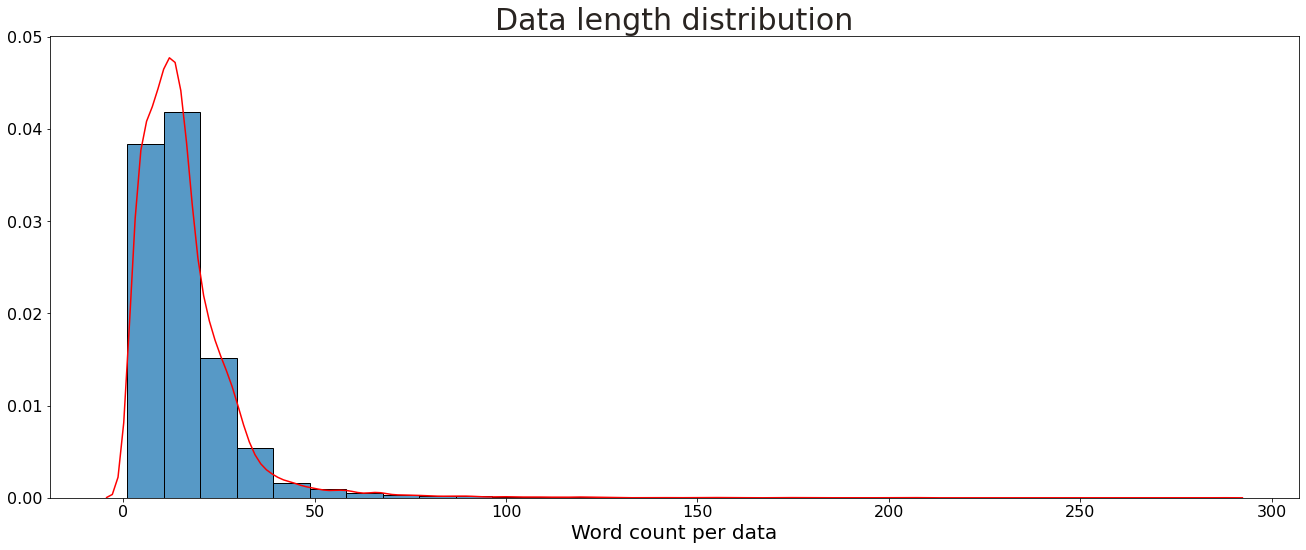

In [49]:
draw2Vec(df,0)

In [16]:
file1 = "./datasets/magaza_yorumlari_duygu_analizi.csv"
file2 = "./datasets/turkish_tweets_2020.csv"


df1 = pd.read_csv("../datasets/magaza_yorumlari_duygu_analizi.csv",encoding="utf-16")
df2 = pd.read_csv("../datasets/turkish_tweets_2020.csv",encoding="utf-8")

In [17]:
df2.isna().value_counts()
df2.head

<bound method NDFrame.head of                                                    text  label
0     edit: bu adam dururken başkan gene melih olurs...      0
1     ahah kuduruyoruz ya amk çomarı biz bu ülkeden ...      1
2     Sınıf gruplarındaki insanlar beyinsiz felan he...      1
3     boğaziçi köprüsünde duran tanklar ( eğer ses t...      0
4     Sevişirler evlenmezler, hamile kalır doğurmazl...      1
...                                                 ...    ...
5077                         yapmayan yalan soyluyordur      0
5078  Nediyonla piç kurusu bugün pazar git ayasofya ...      1
5079  Bunu düşünen, destekleyen, ihaleyi açan, açtır...      1
5080  sadece 45 dakikada girdiğimiz gol pozisyonu sa...      1
5081  ellerindeki en büyük koz genelkurmay başkan'ı....      1

[5082 rows x 2 columns]>

In [6]:
import sqlite3

In [19]:
conn = sqlite3.connect(':memory:')
print(sqlite3.version)

sql_create_deneme_table = """ CREATE TABLE IF NOT EXISTS deneme (
                                    text text ,
                                    sentiment text                                   
                                ); """
c = conn.cursor()
c.execute(sql_create_deneme_table)

sql = ''' INSERT INTO deneme(text,sentiment)
              VALUES(?,?) '''
first_entry = ("bu bir deneme","1")

cur = conn.cursor()
cur.execute(sql, first_entry)
conn.commit()

cur.execute("SELECT * FROM deneme")

rows = cur.fetchall()

for row in rows:
    print(row)

sqlQuery = pd.read_sql_query(''' SELECT text,sentiment FROM deneme ''',conn)
sqldf = pd.DataFrame(sqlQuery, columns=['text', 'sentiment'])
print(sqldf)
conn.close()

2.6.0
('bu bir deneme', '1')
            text sentiment
0  bu bir deneme         1


In [2]:
from keras.preprocessing.text import Tokenizer
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

def draw2Vec(df = None,isTrained = 1):

    if df is None and isTrained == 1:
        conn = psycopg2.connect(
        database="MyDataBase", user='postgres', password='123321', host='127.0.0.1', port= '5432'
        )
        #Creating a cursor object using the cursor() method
        cur = conn.cursor()
        sqlQuery = pd.read_sql_query("""SELECT text,actual_sentiment FROM dbo."Embeddings" WHERE \"isTrained" = TRUE ORDER BY embedding_id ASC""",conn)
        sqldf = pd.DataFrame(sqlQuery)
        sqldf.rename(columns={'actual_sentiment':'sentiment'},inplace=True)
        conn.close()

    elif df is None and isTrained == 0:
        conn = psycopg2.connect(
        database="MyDataBase", user='postgres', password='123321', host='127.0.0.1', port= '5432'
        )
        #Creating a cursor object using the cursor() method
        cur = conn.cursor()
        sqlQuery = pd.read_sql_query("""SELECT text,actual_sentiment FROM dbo."Embeddings" ORDER BY embedding_id ASC""",conn)
        sqldf = pd.DataFrame(sqlQuery)
        sqldf.rename(columns={'actual_sentiment':'sentiment'},inplace=True)
        conn.close()        
    else:

        sqldf = df
    prep = Preprocessmaker()
    df = prep.preprocess(sqldf)

    trained_path = ["./Embedding/trained/swear/data","./Embedding/trained/negative/data","./Embedding/trained/positive/data","./Embedding/trained/embedding/data","./Embedding/trained/classes/data"]
    nonTrained_path = ["./Embedding/nonTrained/swear/data","./Embedding/nonTrained/negative/data","./Embedding/nonTrained/positive/data","./Embedding/nonTrained/embedding/data","./Embedding/nonTrained/classes/data"]
    if(isTrained == 1):
        DrawEmbedding(df,trained_path[0],trained_path[1],trained_path[2],trained_path[3],trained_path[4])
    elif(isTrained == 0):
        DrawEmbedding(df,nonTrained_path[0],nonTrained_path[1],nonTrained_path[2],nonTrained_path[3],nonTrained_path[4])


def DrawEmbedding(df,swear_path,negative_path,positive_path,embedding_path,classes_path):


    
    

    swearWordCount = nltk.FreqDist(word for text in df[df["sentiment"] == 2]["text"] for word in text.lower().split()).most_common(40)
    swear_fdist = pd.Series(dict(swearWordCount))
    plt.subplots(figsize=(10,10))
    plt.title("Küfürlü en çok kullanılan 40 kelime")
    sns.barplot(x=swear_fdist.values, y=swear_fdist.index, orient='h')
    plt.xticks(rotation=30)
    plt.savefig(swear_path, dpi=200, bbox_inches='tight')
    plt.show()
    
  
    
    
    positiveWordCount = nltk.FreqDist(word  for text in df[df["sentiment"] == 1]["text"] for word in text.lower().split()).most_common(40)
    positive_fdist = pd.Series(dict(positiveWordCount))
    plt.subplots(figsize=(10,10))
    plt.title("Pozitif en çok kullanılan 40 kelime")
    sns.barplot(x=positive_fdist.values, y=positive_fdist.index, orient='h')
    plt.xticks(rotation=30)
    plt.savefig(positive_path, dpi=200, bbox_inches='tight')  
    plt.show()

   
    negativeWordCount = nltk.FreqDist(word  for text in df[df["sentiment"] == 0]["text"] for word in text.lower().split()).most_common(40)
    negative_fdist = pd.Series(dict(negativeWordCount))
    plt.subplots(figsize=(10,10))
    plt.title("Negative en çok kullanılan 40 kelime")
    sns.barplot(x=negative_fdist.values, y=negative_fdist.index, orient='h')
    plt.xticks(rotation=30)
    plt.savefig(negative_path, dpi=200, bbox_inches='tight')  
    plt.show()

    plt.subplots(figsize=(10,10))
    df['length'] = [len(x) for x in df['text']]
    plt.title('0:Negatif,1:Pozitif,2:Küfürlü')
    sns.kdeplot(data=df,x='length',hue='sentiment',palette='Dark2')
    plt.savefig(classes_path, dpi=200, bbox_inches='tight') 
    plt.show()

    tokenizer = Tokenizer()
    embedding = df['text'].values
    tokenizer.fit_on_texts(embedding)
    embedding = tokenizer.texts_to_sequences(embedding)
    
    word_count = []

    for encoded_tweet in embedding:
        word_count.append(len(encoded_tweet))

    parameters = {'axes.labelsize': 20,
              'axes.titlesize': 30}
#
    plt.rcParams.update(parameters)
    fig, ax1 = plt.subplots(1, 1)
    fig.set_size_inches(18.5, 8)
    sns.histplot(word_count, palette='Blues', stat='density', bins=30, ax=ax1)
    sns.kdeplot(word_count, color='red', ax=ax1)
    ax1.set_xlabel('Word count per data')
    ax1.tick_params(axis='x', labelsize=16)
    ax1.tick_params(axis='y', labelsize=16)
    ax1.set_ylabel("")
    ax1.set_title("Data length distribution", color ="#292421")
    fig.tight_layout(pad=2.0)
    plt.rcParams.update(parameters)
    plt.savefig(embedding_path, dpi=250, bbox_inches='tight')

def drawmaker():
     draw2Vec(None,1)
     draw2Vec(None,0)


C:\Users\Cemal\AppData\Local\Temp/ipykernel_12528/1738147678.py:22: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['text'] = df['text'].str.replace(char, ' ')
C:\Users\Cemal\AppData\Local\Temp/ipykernel_12528/1738147678.py:22: FutureWarning: The default value of regex will change from True to False in a future version.
  df['text'] = df['text'].str.replace(char, ' ')


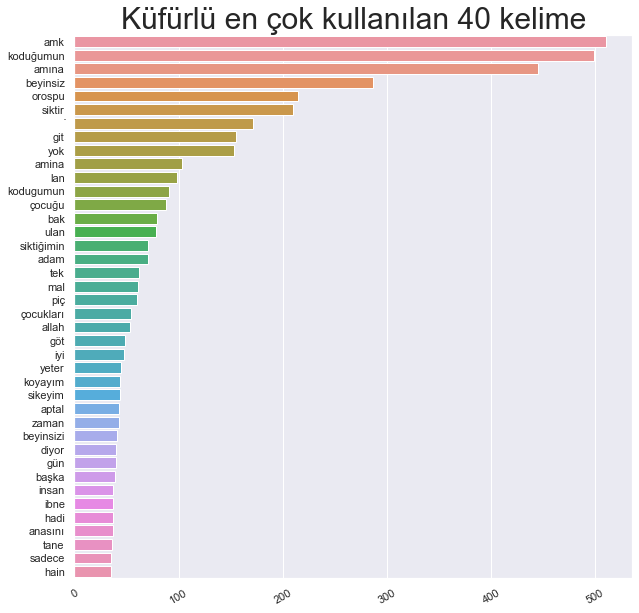

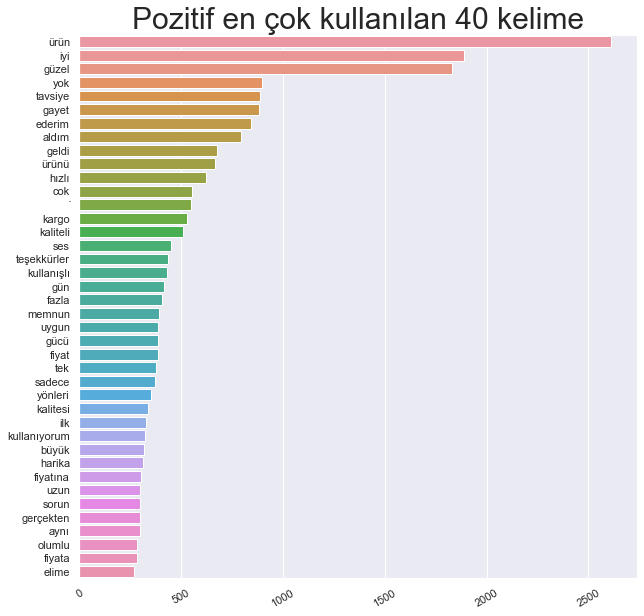

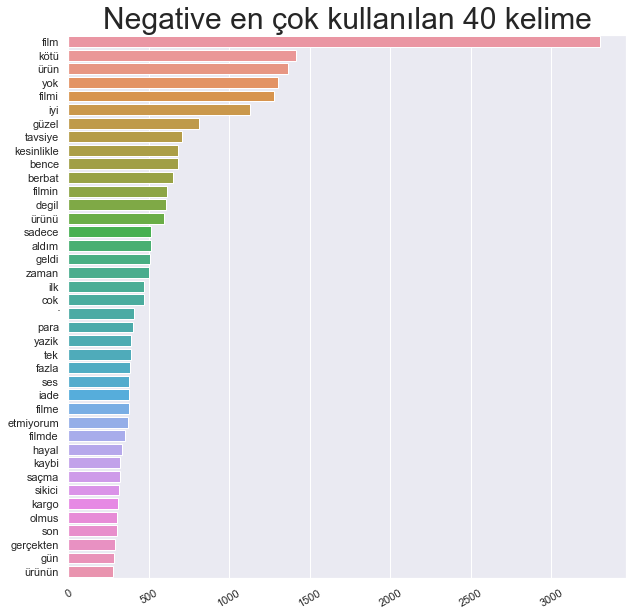

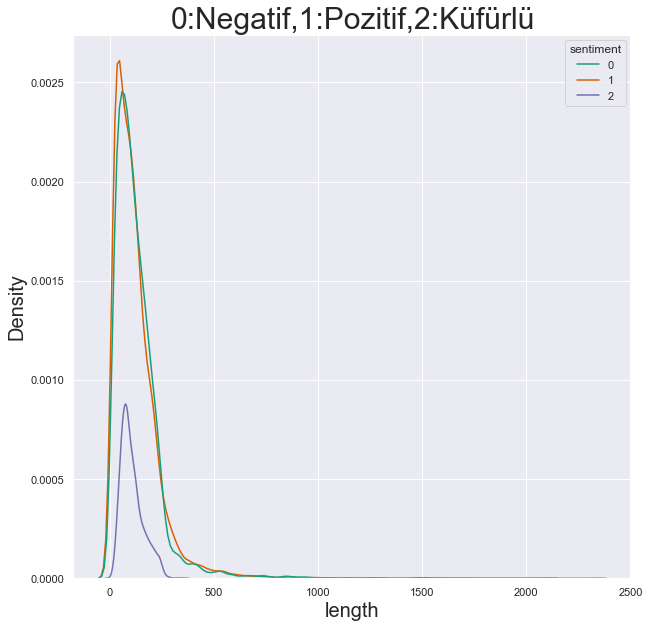

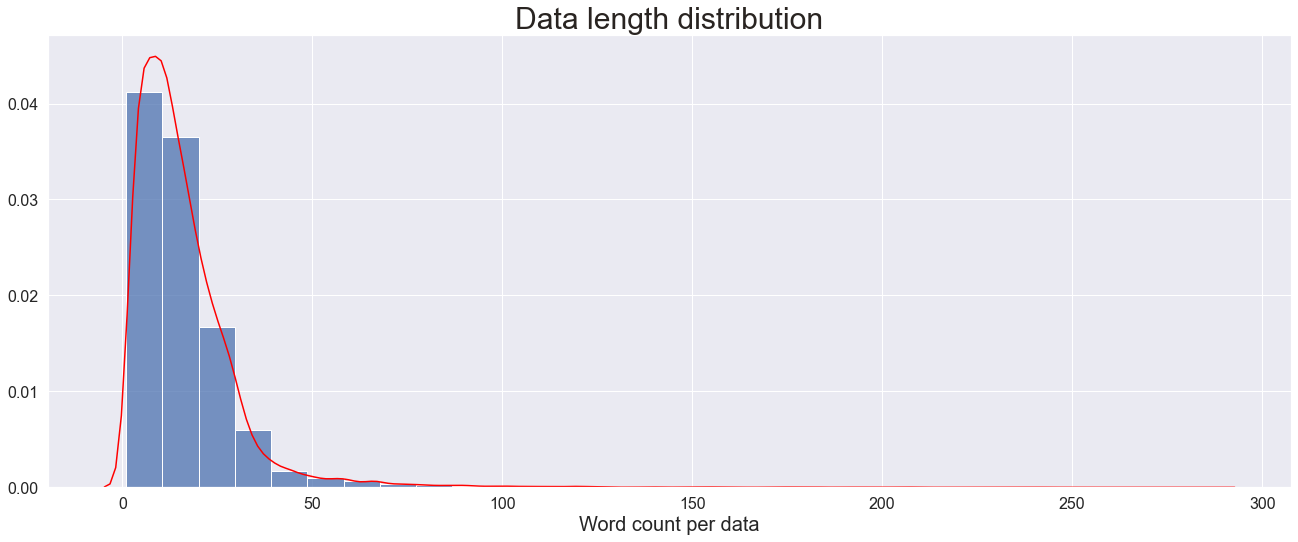

In [162]:
draw2Vec(None,1)

C:\Users\Cemal\AppData\Local\Temp/ipykernel_14344/2489151303.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['label'][key] = "Olumlu"
c:\Python39\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\Cemal\AppData\Local\Temp/ipykernel_14344/1738147678.py:22: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['text'] = df['text'].str.replace(char, ' ')
C:\Users\

,text,sentiment
0,aksine yapmaya çalışan belediyelerin önünü açm...,1
1,süper alışveriş,1
2,başarıli buldum,1
3,aldım servis normal apple garantili sorun yok ...,1
4,sanırım bilinç mefhumunun getirdiği ilginç etk...,1
...,...,...
22065,birakin böle filimler sadece zaman kaybi hiçç ...,0
22066,sen buraya davetlisin bak fasulye aklıyla beni...,2
22067,başarılı ürün balık kızarttık güzel tavsiye ed...,1
22068,süpürgenin çekişi güzel firma sorumluluklarını...,1


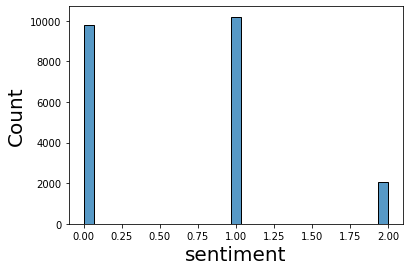

In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import sqlite3
file1 = "./datasets/magaza_yorumlari_duygu_analizi.csv"
file2 = "./datasets/turkish_tweets_2020.csv"


df1 = pd.read_csv("../datasets/magaza_yorumlari_duygu_analizi.csv",encoding="utf-16")
df2 = pd.read_csv("../datasets/turkish_tweets_2020.csv",encoding="utf-8")
df1.isna().value_counts()
df1 = df1.dropna()
df1.loc[(df1.Durum == 'Tarafsız'),'Durum']='Olumlu'
df2.isna().value_counts()
key = 0
for i in df2['label']:
    
    if i == 0:
        df2['label'][key] = "Olumlu"
    elif i == 1:
        df2['label'][key] = "Kufurlu"
    key+=1 

df1_new1 = df1.rename(columns={'Görüş': 'text','Durum':'label'})

df1_new1.head
result = pd.concat([df1_new1,df2],axis=0)
result.reset_index(drop=True,inplace = True)
result = result.sample(frac = 1)
result.reset_index(drop=True,inplace = True)
result.loc[:,'sentiment'] = result.label.map({'Olumsuz':0,'Olumlu':1,'Kufurlu':2})
result = result.drop(['label'],axis = 1)
extra_1 = pd.read_csv("../datasets/magaza_yorumlari_short.csv")
extra_2 = pd.read_csv("../datasets/film_yorumlari.csv",index_col=[0],encoding="windows-1252")
extra_3 = pd.read_csv("../datasets/film_yorumlari_2.csv",index_col=[0],encoding="windows-1252")
extra_1 = extra_1.rename(columns={'Yorum': 'text','Duygu':'sentiment'})
extra_2 = extra_2.rename(columns={'comment': 'text','Label':'sentiment'})
extra_3 = extra_3.rename(columns={'comment': 'text','Label':'sentiment'})
df_extra = pd.concat([extra_1,extra_2,extra_3],axis=0)
df_extra = df_extra[df_extra["sentiment"] == 0]
result = pd.concat([result,df_extra],axis=0)
result = result.sample(frac = 1)
result.reset_index(drop=True,inplace = True)
sns.histplot(result['sentiment'])

df = result
prep = Preprocessmaker(df)
df = prep.preprocess(df)
df



In [37]:
import numpy as np 
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

class Preprocessmaker:

    def __init__(self,df = None):
               
        self.df = df

    def remove_spec_chars(self,df):
        spec_chars = ["!",'"',"#","%","&","'","(",")",
                    "*","+",",","-",".","/",":",";","<",
                    "=",">","<b>","<b>","<br />","\\n","?","@","[","\\","]","^","_",
                    "`","{","|","}","~","–"]
        for char in spec_chars:
            df['text'] = df['text'].str.replace(char, ' ')
        return df

    def get_stopwords_list(self,stop_file_path):
        """load stop words """

        with open(stop_file_path, 'r', encoding="utf-8") as f:
            stopwords = f.readlines()
            stop_set = set(m.strip() for m in stopwords)
            return list(frozenset(stop_set))
    
    def delete_stopwords(self,df,stop_words):
        df['text'] = df['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))
        return df
    
    def remove_numbers(self,df, label):
        """ This function removes numbers from a text
            inputs:
            - text """
        df[label] = df[label].apply(lambda x: re.sub(r"\d+", " ", x))
        return df

    def clean_eol_tabs(self,df, label):
        """ text lowercase
            removes \n
            removes \t
            removes \r """
        df[label] = df[label].str.lower()
        df[label] = df[label].apply(lambda x: x.replace("\n", " "))
        df[label] = df[label].apply(lambda x: x.replace("\r", " "))
        df[label] = df[label].apply(lambda x: x.replace("\t", " "))
        return df

    def more_cleaning(self,df, label):
        """ This function
        1) removes remaining one-letter words and two letters words
        2) replaces multiple spaces by one single space
        3) drop empty lines """
        
        df[label] = df[label].apply(lambda x: re.sub(r'\b\w{1,2}\b', " ", x))
        df[label] = df[label].apply(lambda x: re.sub(r"[ \t]{2,}", " ", x))
        df[label] = df[label].apply(lambda x: x if len(x) != 1 else '')
        df[label] = df[label].apply(lambda x: np.nan if x == '' else x)
        df = df.dropna(subset=[label], axis=0).reset_index(drop=True).copy()
        return df
    
    def get_df(self):
        self.conn = sqlite3.connect(':memory:')
        sqlQuery = pd.read_sql_query(''' SELECT text,sentiment FROM deneme ''',self.conn)
        self.df = pd.DataFrame(sqlQuery, columns=['text', 'sentiment'])

    def preprocess(self,df):
        """prepare data to training and testing"""
             
        df = self.remove_spec_chars(df)
        stop_words = self.get_stopwords_list("../datasets/turkish.txt")
        df = self.delete_stopwords(df,stop_words)
        df = self.remove_numbers(df,"text")
        df = self.clean_eol_tabs(df,"text")
        df = self.more_cleaning(df,"text")
        return df



In [32]:

from CustomModel import CustomModel
import psycopg2

def predict_asAModel(model_id,text):

    modeldatabase = get_model(model_id)
    print(modeldatabase)
    modelName = modeldatabase[0][1]
    modelType = modeldatabase[0][2]
    if(modelType == "custom"):

        model = CustomModel()
        model_path = "../Models/" + modelName + "/"
        embedding_path = model_path + "embedding.pickle"
        model.load_model(model_path,"CustomModel")
        model.summary()
        return model.predict(text,embedding_path)

    elif(modelType == "bert"):
        model = BertModel()
        model_path = "../Models/" + modelName + "/"
        model.load_model(model_path,"bert_model")
        return model.predict(text)
    

def get_model(model_id):
    conn = psycopg2.connect(
        database="MyDataBase", user='postgres', password='123321', host='127.0.0.1', port= '5432'
    )
    cur = conn.cursor()
    sql = ''' SELECT * FROM dbo."Models" WHERE model_id = %s '''
    cur.execute(sql,[model_id])
    data = cur.fetchall()
    conn.close()
    return data

In [38]:
predict = predict_asAModel(1,"amk evladı seni orospu evladı seni")
print(predict)

[(1, 'base-Bert', 'bert', 0.86413044, 0.34987763, 32, 5, 100, True, datetime.datetime(2022, 5, 17, 20, 38, 31, 753463))]


Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['mlm___cls', 'nsp___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.
C:\Users\Cemal\AppData\Local\Temp/ipykernel_11044/1243067778.py:20: FutureWarning: The default value of regex will change from True to False in a future version. I

küfürlü


In [34]:
from sklearn import preprocessing
from transformers import BertTokenizerFast
from sklearn.model_selection import train_test_split

class EmbeddingBert:



    def prepare_training(self,df,test_size=0.15):
        self.raw_docs_train = df["text"].values
        self.sentiment_train = df['sentiment'].values
        X_train, X_test, Y_train, Y_test = train_test_split(self.raw_docs_train, self.sentiment_train, 
                                                    stratify=self.sentiment_train, 
                                                    random_state=42, 
                                                    test_size=test_size, shuffle=True)

        return X_train, X_test, Y_train, Y_test       

    def tokenize_forBert(self,data,max_len=100):
        tokenizer = BertTokenizerFast.from_pretrained('bert-base-uncased', do_lower_case=True)
        input_ids = []
        attention_masks = []
        for i in range(len(data)):
            encoded = tokenizer.encode_plus(
                data[i],
                add_special_tokens=True,
                max_length=max_len,
                padding='max_length',
                return_attention_mask=True,
                truncation=True
            )
            input_ids.append(encoded['input_ids'])
            attention_masks.append(encoded['attention_mask'])
            
        return np.array(input_ids),np.array(attention_masks)
    
    def y_tokenize(self,Y_train,Y_test):
        
        ohe = preprocessing.OneHotEncoder()
        Y_train = ohe.fit_transform(np.array(Y_train).reshape(-1, 1)).toarray()
        Y_test = ohe.fit_transform(np.array(Y_test).reshape(-1, 1)).toarray()       
        return Y_train,Y_test

    

In [22]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

class EmbeddingCustom:

    def __init__(self,df):
        self.raw_docs_train = df["text"].values
        self.sentiment_train = df['sentiment'].values
        self.tokenizer = Tokenizer()

    def prepare_training(self,test_size=0.15):
        X_train, X_test, Y_train, Y_test = train_test_split(self.raw_docs_train, self.sentiment_train, 
                                                    stratify=self.sentiment_train, 
                                                    random_state=42, 
                                                    test_size=test_size, shuffle=True)

        return X_train, X_test, Y_train, Y_test


    def tokenize_forCustom(self,X_train,X_test,path,name,max_len=100):
        self.tokenizer.fit_on_texts(X_train)
        X_train = self.tokenizer.texts_to_sequences(X_train)
        X_test = self.tokenizer.texts_to_sequences(X_test)
        X_train = pad_sequences(X_train, maxlen=max_len, padding='post')
        X_test = pad_sequences(X_test, maxlen=max_len, padding='post')

        #we need to save tokenizer.
        self.save_tokenizer(path,name)

        return X_train,X_test
    
    def save_tokenizer(self,path,name):
        with open(path + name +'.pickle', 'wb') as handle:
            pickle.dump(self.tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

    def y_tokenize(self,Y_train,Y_test):
        from keras.utils import np_utils
        num_labels = len(np.unique(self.sentiment_train))
        Y_train = np_utils.to_categorical(Y_train, num_labels)
        Y_test = np_utils.to_categorical(Y_test, num_labels)

        return Y_train,Y_test

    def get_vocab_length(self):
        vocab_length = len(self.tokenizer.word_index) + 1
        return vocab_length

In [15]:
import pickle
import tensorflow as tf
from keras.callbacks import EarlyStopping
from keras.models import Model
from keras.layers import Dense, Input, Dropout, Conv1D, GRU,LSTM, Activation, Bidirectional,TimeDistributed,GlobalAveragePooling1D, GlobalMaxPooling1D, concatenate, SpatialDropout1D,Flatten
from keras.layers.embeddings import Embedding
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
#import Preprocessmaker

class CustomModel:

    def __init__(self,vocab_length = 64052,maxlen=100):
        self.maxlen = maxlen
        self.vocab_length = vocab_length
        self.model = None
        self.history = None
        self.earlystop = EarlyStopping(monitor='val_loss', min_delta=0, patience=3, verbose=0, mode='auto')

    def construct_custom_model(self,input_shape):

        input =  Input(shape=input_shape, dtype='int32') 
        embeddings = Embedding(self.vocab_length, output_dim=32, input_length=self.maxlen, mask_zero=True)(input)  
        X = Bidirectional(LSTM(50,dropout=0.2,recurrent_dropout=0.5,return_sequences=True))(embeddings)
        X = Conv1D(100,3,activation='relu')(X)
        X = Dropout(0.2)(X)
        X = Conv1D(50,3,activation='relu')(X)   
        X = GRU(50,dropout=0.2,recurrent_dropout=0.5)(X)
        X = Dropout(0.2)(X)  
        X = Dense(3, activation='softmax')(X)
        
        self.model = Model(inputs=input, outputs=X)

        return self.model

    def compile(self):
        self.model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

    def summary(self):
        self.model.summary()

    def fit(self,X_train,Y_train,X_test,Y_test,batch_size=64,epochs=20):
        self.history = self.model.fit(x=X_train, y=Y_train, batch_size=batch_size,epochs=epochs,callbacks=self.earlystop, 
          verbose=1, validation_data=(X_test, Y_test))

    def get_accuracy(self,X_test,Y_test):
        self.model.evaluate(X_test,Y_test)
        result = []
        result.append(self.history.history['val_acc'][-1])
        result.append(self.history.history['val_loss'][-1])
        return result
    
    def save_model(self,path,name):
        try:
            self.model.save(path + name)
        except:
            print("Model kaydedilirken bir hata oluştu")
            
    def load_model(self,path,name):
        try:
            self.model = tf.keras.models.load_model(path + name + ".h5") 
        except:
            print("Model Yüklenirken bir hata oluştu")

    def draw_metrics(self,path):

        try:
            acc = self.history.history['acc']
            val_acc = self.history.history['val_acc']
            loss = self.history.history['loss']
            val_loss = self.history.history['val_loss']

            epochs = range(1, len(acc) + 1)
            fig = plt.figure(figsize=(10, 5))
            fig.tight_layout()


            plt.plot(epochs, acc, 'r', label='Training acc')
            plt.plot(epochs, val_acc, 'b', label='Validation acc')
            plt.title('Training and validation accuracy')
            plt.ylabel('Accuracy')
            plt.legend()

            plt.savefig(path + "/acc", dpi=250, bbox_inches='tight')

            plt.figure(figsize=(10, 5))
            plt.plot(epochs, loss, 'r', label='Training loss')
            plt.plot(epochs, val_loss, 'b', label='Validation loss')
            plt.title('Training and validation loss')
            plt.ylabel('Loss')
            plt.legend()

            plt.savefig(path + "/loss", dpi=250, bbox_inches='tight')
        except:
            print("çizimler yapılırken bir hata oluştu")


    def predict(self,text,embedding_path):

        test_data = self.clean_forPredict(text)

        with open(embedding_path, 'rb') as handle:
            reloaded_tokenizer = pickle.load(handle)

        classes = {0:'Olumsuz', 1:'Olumlu', 2:'Kufurlu'}
        test_data = reloaded_tokenizer.texts_to_sequences(test_data)
        test_data = pad_sequences(test_data, maxlen=self.maxlen, padding='post')
        return str(classes[np.argmax(self.model.predict(test_data))])

    def clean_forPredict(self,text):
        test_data = np.array([text])
        df = pd.DataFrame(test_data,columns=['text'])
        prep = Preprocessmaker(df)
        df = prep.preprocess(df)
        return df['text'].to_numpy()

        

In [35]:

from transformers import BertTokenizerFast
from transformers import TFBertModel
import tensorflow as tf
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import seaborn as sns
#import Tokenizer

class BertModel:

    def __init__(self,maxlen=100,pretrained_bert='bert-base-uncased'):
        self.maxlen = maxlen
        self.bertmodel = TFBertModel.from_pretrained(pretrained_bert)
        self.model = None 
        self.history = None
        self.earlystop = EarlyStopping(monitor='val_loss', min_delta=0, patience=3, verbose=0, mode='auto')

    def construct_custom_model(self):

    
        opt = tf.keras.optimizers.Adam(learning_rate=1e-5, decay=1e-7)
        loss = tf.keras.losses.CategoricalCrossentropy()
        accuracy = tf.keras.metrics.CategoricalAccuracy()


        input_ids = tf.keras.Input(shape=(self.maxlen,),dtype='int32')
        
        attention_masks = tf.keras.Input(shape=(self.maxlen,),dtype='int32')
        
        embeddings = self.bertmodel([input_ids,attention_masks])[1]
        
        output = tf.keras.layers.Dense(3, activation="softmax")(embeddings)
        
        self.model = tf.keras.models.Model(inputs = [input_ids,attention_masks], outputs = output)
        
        self.model.compile(opt, loss=loss, metrics=accuracy)
        
        
        return self.model


    def fit(self,train_input_ids,train_attention_masks,test_input_ids,test_attention_masks,y_train,y_test,batch_size=32,epochs=10):
        self.history = self.model.fit([train_input_ids,train_attention_masks], y_train, validation_data=([test_input_ids,test_attention_masks], y_test), 
        epochs=epochs, batch_size=batch_size)

    def get_metric(self,test_input_ids,test_attention_masks,y_test):
        self.model.evaluate(x=[test_input_ids,test_attention_masks],y=y_test)
        result = []
        result.append(self.history.history['val_categorical_accuracy'][-1])
        result.append(self.history.history['val_loss'][-1])
        return result
    
    def save_model(self,path,name):
        try:
            self.model.save(path + name)
        except:
            print("Model kaydedilirken bir hata oluştu")
            
    def load_model(self,path,name):
        try:
            self.model = tf.keras.models.load_model(path + name + ".h5",custom_objects={'TFBertModel':TFBertModel}) 
        except:
            print("Model Yüklenirken bir hata oluştu")

    def draw_metrics(self,path):

        try:
            acc = self.history.history['categorical_accuracy']
            val_acc = self.history.history['val_categorical_accuracy']
            loss = self.history.history['loss']
            val_loss = self.history.history['val_loss']

            epochs = range(1, len(acc) + 1)
            fig = plt.figure(figsize=(10, 5))
            fig.tight_layout()


            plt.plot(epochs, acc, 'r', label='Training acc')
            plt.plot(epochs, val_acc, 'b', label='Validation acc')
            plt.title('Training and validation accuracy')
            plt.ylabel('Accuracy')
            plt.legend()

            plt.savefig(path, dpi=250, bbox_inches='tight')

            plt.figure(figsize=(10, 5))
            plt.plot(epochs, loss, 'r', label='Training loss')
            plt.plot(epochs, val_loss, 'b', label='Validation loss')
            plt.title('Training and validation loss')
            plt.ylabel('Loss')
            plt.legend()

            plt.savefig(path, dpi=250, bbox_inches='tight')
        except:
            print("çizimler yapılırken bir hata oluştu")


    def predict(self,text):

        test_data = self.clean_forPredict(text)

        pred_sentences = test_data
        tok = EmbeddingBert()
        input_id, input_mask = tok.tokenize_forBert(pred_sentences, self.maxlen)
        tf_outputs = self.model.predict([input_id, input_mask])
        tf_predictions = tf.nn.softmax(tf_outputs[0], axis=-1)
        labels = ['olumsuz', 'olumlu', 'küfürlü']
        label = np.argmax(tf_predictions)

        return labels[label]

    def clean_forPredict(self,text):
        test_data = np.array([text])
        df = pd.DataFrame(test_data,columns=['text'])
        prep = Preprocessmaker(df)
        df = prep.preprocess(df)
        return df['text'].to_numpy()

C:\Users\Cemal\AppData\Local\Temp/ipykernel_14344/3829113838.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['label'][key] = "Olumlu"
c:\Python39\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,text,sentiment
0,"her zaman saygıyla anılacak, nesillere anlatıl...",1
1,Olumlu yönleri: evde evcil hayvanınız varsa sü...,1
2,ürün kaliteli tereddüt etmeden alabilirsiniz,1
3,bakın aklıma muazzam fikir geldi. şeftali tüyü...,2
4,eglencelik bir film..fantastic bir film ama ba...,0
...,...,...
22071,Bayram öncesi Ankara Gölbaşı bayiisinden Veste...,0
22072,bilim kurgu filmi beklentilerinizi yikmak iste...,0
22073,"Sesi çok fazla, gerçekten abartılı sesi var bu...",1
22074,hayatımda yaptığım en mantıklı şeylerden biri ...,1


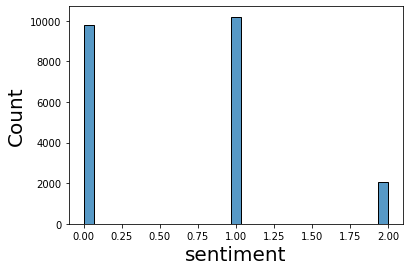

In [87]:
import pandas as pd
import numpy as np
import seaborn as sns

file1 = "./datasets/magaza_yorumlari_duygu_analizi.csv"
file2 = "./datasets/turkish_tweets_2020.csv"


df1 = pd.read_csv("../datasets/magaza_yorumlari_duygu_analizi.csv",encoding="utf-16")
df2 = pd.read_csv("../datasets/turkish_tweets_2020.csv",encoding="utf-8")
df1.isna().value_counts()
df1 = df1.dropna()
df1.loc[(df1.Durum == 'Tarafsız'),'Durum']='Olumlu'
df2.isna().value_counts()
key = 0
for i in df2['label']:
    
    if i == 0:
        df2['label'][key] = "Olumlu"
    elif i == 1:
        df2['label'][key] = "Kufurlu"
    key+=1 

df1_new1 = df1.rename(columns={'Görüş': 'text','Durum':'label'})

df1_new1.head
result = pd.concat([df1_new1,df2],axis=0)
result.reset_index(drop=True,inplace = True)
result = result.sample(frac = 1)
result.reset_index(drop=True,inplace = True)
result.loc[:,'sentiment'] = result.label.map({'Olumsuz':0,'Olumlu':1,'Kufurlu':2})
result = result.drop(['label'],axis = 1)
extra_1 = pd.read_csv("../datasets/magaza_yorumlari_short.csv")
extra_2 = pd.read_csv("../datasets/film_yorumlari.csv",index_col=[0],encoding="windows-1252")
extra_3 = pd.read_csv("../datasets/film_yorumlari_2.csv",index_col=[0],encoding="windows-1252")
extra_1 = extra_1.rename(columns={'Yorum': 'text','Duygu':'sentiment'})
extra_2 = extra_2.rename(columns={'comment': 'text','Label':'sentiment'})
extra_3 = extra_3.rename(columns={'comment': 'text','Label':'sentiment'})
df_extra = pd.concat([extra_1,extra_2,extra_3],axis=0)
df_extra = df_extra[df_extra["sentiment"] == 0]
result = pd.concat([result,df_extra],axis=0)
result = result.sample(frac = 1)
result.reset_index(drop=True,inplace = True)
sns.histplot(result['sentiment'])
df = result
df

In [16]:
from BertModel import BertModel
from EmbeddingBert import EmbeddingBert
from Preprocess import Preprocessmaker

from CustomModel import CustomModel
from EmbeddingCustom import EmbeddingCustom
import psycopg2
import datetime
import os
import pandas as pd


def Factory(type, maxlen=100, batch_size=64, epoch=15):
    if type == "custom":
        TrainerCustom(maxlen, batch_size, epoch)
    elif type == "bert":
        TrainerBert(maxlen, batch_size, epoch)
    else:
        print("Büyük bir problem algılandı, eğitim iptal ediliyor.")


def TrainerCustom(maxlen, batch_size, epoch):
    # get data from database, when database implemented, write here
    conn = psycopg2.connect(
        database="MyDataBase", user='postgres', password='123321', host='127.0.0.1', port='5432'
    )
    # Creating a cursor object using the cursor() method
    cur = conn.cursor()
    sqlQuery = pd.read_sql_query(
        """SELECT text,actual_sentiment FROM dbo."Embeddings" WHERE \"isTrained" = TRUE ORDER BY embedding_id ASC""",
        conn)
    sqldf = pd.DataFrame(sqlQuery)
    sqldf.rename(columns={'actual_sentiment': 'sentiment'}, inplace=True)
    conn.close()

    df = sqldf
    path = makedirectory()
    pathList = str(path).split("/")
    modelName = pathList[-1]

    prep = Preprocessmaker(df)
    df = prep.preprocess(df)
    embed = EmbeddingCustom(df)
    X_train, X_test, Y_train, Y_test = embed.prepare_training()
    X_train, X_test = embed.tokenize_forCustom(X_train, X_test, path, "/embedding")
    Y_train, Y_test = embed.y_tokenize(Y_train, Y_test)
    vocab_length = embed.get_vocab_length()
    cus_model = CustomModel(vocab_length)
    cus_model.construct_custom_model((maxlen,))
    cus_model.summary()
    cus_model.compile()
    cus_model.fit(X_train, Y_train, X_test, Y_test, batch_size, epoch)

    evaluate = cus_model.get_accuracy(X_test, Y_test)
    acc = evaluate[0]
    loss = evaluate[1]
    strpath = str(path)
    cus_model.save_model(strpath, "/CustomModel.h5")

    strpath = strpath + "/"
    statistic = "statistic"
    stapath = os.path.join(strpath, statistic)
    os.mkdir(stapath)
    cus_model.draw_metrics(stapath)

    type = "custom"
    realEpoch = len(cus_model.history.history['val_loss'])
    createdOn = datetime.datetime.today()
    isActive = False

    conn = psycopg2.connect(
        database="MyDataBase", user='postgres', password='123321', host='127.0.0.1', port='5432'
    )
    # Creating a cursor object using the cursor() method
    cur = conn.cursor()
    sql = ''' INSERT INTO dbo."Models"(\"modelName",type,\"Accuracy","loss","batch_size","epoch","maxlen",\"createdOn",\"isActive")
                VALUES(%s,%s,%s,%s,%s,%s,%s,%s,%s) '''

    model2database = (modelName, type, acc, loss, batch_size, realEpoch, maxlen, createdOn, isActive)
    cur.execute(sql, model2database)
    conn.commit()
    sql = ''' UPDATE dbo."Embeddings" SET "isTrained" = TRUE WHERE "isTrained" = FALSE'''
    cur.execute(sql)
    conn.commit()
    conn.close()
    print("tip: " + type + " acc: " + str(acc) + " loss: " + str(loss) + " model name: " + modelName + " epoch: " + str(
        epoch))


def TrainerBert(df, maxlen, batch_size, epoch):
    # get data from database, when database implemented, write here
    path = makedirectory()
    pathList = str(path).split("/")
    modelName = pathList[-1]

    prep = Preprocessmaker(df)
    df = prep.preprocess(df)
    embed = EmbeddingBert(df)
    X_train, X_test, Y_train, Y_test = embed.prepare_training()
    train_input_ids, train_attention_masks = embed.tokenize_forBert(X_train)
    test_input_ids, test_attention_masks = embed.tokenize_forBert(X_test)
    Y_train, Y_test = embed.y_tokenize(Y_train, Y_test)
    bert_model = BertModel()
    bert_model.construct_custom_model()
    bert_model.compile()
    bert_model.fit(train_input_ids, train_attention_masks, test_input_ids, test_attention_masks, Y_train, Y_test,
                   batch_size, epoch)

    evaluatedData = bert_model.get_accuracy(test_input_ids, test_attention_masks, Y_test)
    acc = evaluatedData[0]
    loss = evaluatedData[1]
    strpath = str(path)
    bert_model.save_model(strpath, "/BertModel.h5")

    strpath = strpath + "/"
    statistic = "statistic"
    stapath = os.path.join(strpath, statistic)
    os.mkdir(stapath)
    bert_model.draw_metrics(stapath)

    type = "custom"
    realEpoch = len(bert_model.history.history['val_loss'])
    createdOn = datetime.datetime.today()
    isActive = False

    conn = psycopg2.connect(
        database="MyDataBase", user='postgres', password='123321', host='127.0.0.1', port='5432'
    )
    # Creating a cursor object using the cursor() method
    cur = conn.cursor()
    sql = ''' INSERT INTO dbo."Models"(\"modelName",type,\"Accuracy","loss","batch_size","epoch","maxlen",\"createdOn",\"isActive")
                VALUES(%s,%s,%s,%s,%s,%s,%s,%s,%s) '''

    model2database = (modelName, type, acc, loss, batch_size, realEpoch, maxlen, createdOn, isActive)
    cur.execute(sql, model2database)
    conn.commit()
    sql = ''' UPDATE dbo."Embeddings" SET "isTrained" = TRUE WHERE "isTrained" = FALSE'''
    cur.execute(sql)
    conn.commit()
    conn.close()


def makedirectory():
    parent_dir = "../Models/"
    date = datetime.datetime.now()
    mkdir_name = str(date.day) + "-" + str(date.month) + "-" + str(date.year) + "-" + str(date.hour) + "." + str(
        date.minute) + "-Custom"
    print(parent_dir + mkdir_name)
    path = os.path.join(parent_dir, mkdir_name)
    os.mkdir(path)
    return path

../Models/19-5-2022-19.55-Custom


c:\Users\Cemal\Desktop\bitirme tezi\proje\src\backend\Classes\Preprocess.py:23: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['text'] = df['text'].str.replace(char, ' ')


Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 100)]             0         
                                                                 
 embedding_4 (Embedding)     (None, 100, 32)           2054720   
                                                                 
 bidirectional_4 (Bidirectio  (None, 100, 100)         33200     
 nal)                                                            
                                                                 
 conv1d_8 (Conv1D)           (None, 98, 100)           30100     
                                                                 
 dropout_8 (Dropout)         (None, 98, 100)           0         
                                                                 
 conv1d_9 (Conv1D)           (None, 96, 50)            15050     
                                                           

c:\Users\Cemal\Desktop\bitirme tezi\proje\src\backend\Classes\Preprocess.py:23: FutureWarning: The default value of regex will change from True to False in a future version.
  df['text'] = df['text'].str.replace(char, ' ')


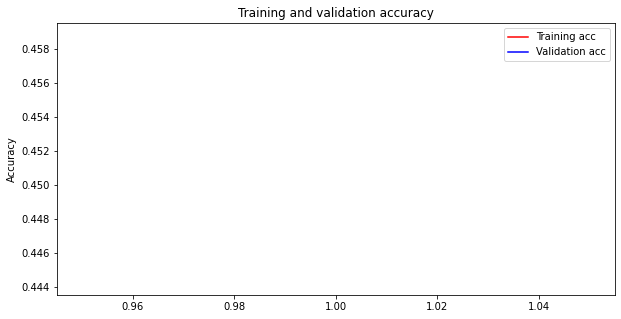

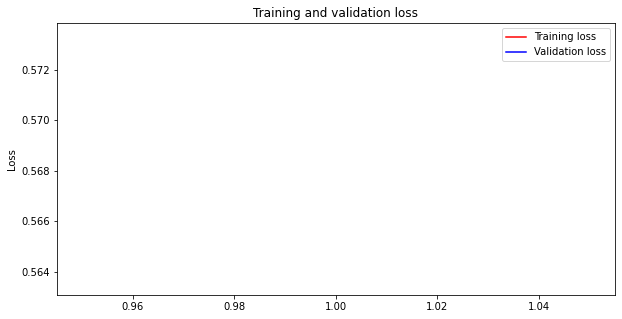

In [17]:
Factory("custom",100,64,1)

In [92]:
path = makedirectory()
pathList = str(path).split("/")
modelName = pathList[-1]
print(modelName)

../Models/16-5-16-20.41-Custom
16-5-16-20.41-Custom


In [ ]:
TrainerCustom(df)


In [10]:

prep = Preprocessmaker(df)
df = prep.preprocess(df)
df

C:\Users\Cemal\AppData\Local\Temp/ipykernel_3488/1738147678.py:22: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['text'] = df['text'].str.replace(char, ' ')
C:\Users\Cemal\AppData\Local\Temp/ipykernel_3488/1738147678.py:22: FutureWarning: The default value of regex will change from True to False in a future version.
  df['text'] = df['text'].str.replace(char, ' ')


,text,sentiment
0,serinin ilk ürününü aldım kullanıyorum tavye e...,1
1,ürünü yıldır kullanıyorum demlik doluyken ilk...,1
2,sessiz gayet güzel yıkıyor ıslak bırakıyor diy...,1
3,türkiye ekonomisinde kariyer merdivenini tırma...,1
4,urun cok kullanisli cok renk cesidi icinde dik...,1
...,...,...
22065,filmde ilgimi çeken büyük sey poison ivy sakla...,0
22066,kabul etmemiz sey insanimiz recep ivedik karak...,0
22067,görüntü aldatmasın küçük hoparlör sesi kalites...,1
22068,insanın değerini aşağı çeken insanın maddi man...,1


In [25]:
import os
path = os.getcwd()
name = "\\deneme"
print(path)
print(name)

c:\Users\Cemal\Desktop\bitirme tezi\codes\Classes
\deneme.pickle


In [13]:
embed = EmbeddingBert()

In [14]:
X_train,X_test,Y_train,Y_test = embed.prepare_training(df)

In [15]:
train_input_ids, train_attention_masks = embed.tokenize_forBert(X_train)
test_input_ids, test_attention_masks = embed.tokenize_forBert(X_test)

In [16]:
Y_train,Y_test = embed.y_tokenize(Y_train,Y_test)

In [42]:
model = BertModel()

Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['nsp___cls', 'mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


In [43]:
model.construct_custom_model()

In [44]:
model.model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_7 (InputLayer)           [(None, 100)]        0           []                               
                                                                                                  
 input_8 (InputLayer)           [(None, 100)]        0           []                               
                                                                                                  
 tf_bert_model_4 (TFBertModel)  TFBaseModelOutputWi  109482240   ['input_7[0][0]',                
                                thPoolingAndCrossAt               'input_8[0][0]']                
                                tentions(last_hidde                                               
                                n_state=(None, 100,                                         

In [45]:
model.fit(train_input_ids,train_attention_masks,test_input_ids,test_attention_masks,Y_train,Y_test,32,1)

  8/587 [..............................] - ETA: 2:05:53 - loss: 1.0540 - categorical_accuracy: 0.4102

KeyboardInterrupt: 

In [27]:
model.get_accuracy(test_input_ids,test_attention_masks,Y_test)

104/104 [==============================] - 376s 4s/step - loss: 0.9517 - categorical_accuracy: 0.4835


0.48353973031044006

In [47]:
model.save_model("C:\\Users\\Cemal\Desktop\\bitirme tezi\\codes\\Classes","\\denememodel2")

In [50]:
model.draw_metrics("C:\\Users\\Cemal\Desktop\\bitirme tezi\\codes\\Classes\\acc2.png","C:\\Users\\Cemal\Desktop\\bitirme tezi\\codes\\Classes\\loss.png2")

çizimler yapılırken bir hata oluştu


In [46]:
model.predict("Hayat çok güzel mutluyum....")

C:\Users\Cemal\AppData\Local\Temp/ipykernel_14536/1738147678.py:22: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['text'] = df['text'].str.replace(char, ' ')
C:\Users\Cemal\AppData\Local\Temp/ipykernel_14536/1738147678.py:22: FutureWarning: The default value of regex will change from True to False in a future version.
  df['text'] = df['text'].str.replace(char, ' ')


'olumsuz'

In [49]:
model.load_model("C:\\Users\\Cemal\Desktop\\bitirme tezi\\codes\\Classes","\\denememodel2")

In [51]:
model.predict("Hayat çok güzel mutluyum....")

C:\Users\Cemal\AppData\Local\Temp/ipykernel_14536/1738147678.py:22: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['text'] = df['text'].str.replace(char, ' ')
C:\Users\Cemal\AppData\Local\Temp/ipykernel_14536/1738147678.py:22: FutureWarning: The default value of regex will change from True to False in a future version.
  df['text'] = df['text'].str.replace(char, ' ')


'olumsuz'

In [26]:
embed = EmbeddingCustom(df)
X_train,X_test,Y_train,Y_test = embed.prepare_training()
X_train,X_test = embed.tokenize_forCustom(X_train,X_test,path,name)
Y_train,Y_test = embed.y_tokenize(Y_train,Y_test)
vocab_length = embed.get_vocab_length()

In [75]:
cus_model = CustomModel(vocab_length)

In [76]:
cus_model.construct_custom_model((100,))

In [77]:
cus_model.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 100)]             0         
                                                                 
 embedding_5 (Embedding)     (None, 100, 32)           2057952   
                                                                 
 bidirectional_5 (Bidirectio  (None, 100, 100)         33200     
 nal)                                                            
                                                                 
 conv1d_10 (Conv1D)          (None, 98, 100)           30100     
                                                                 
 dropout_10 (Dropout)        (None, 98, 100)           0         
                                                                 
 conv1d_11 (Conv1D)          (None, 96, 50)            15050     
                                                           

In [78]:
cus_model.compile()

In [79]:
cus_model.fit(X_train,Y_train,X_test,Y_test,64,2)

Epoch 1/2
294/294 [==============================] - 68s 213ms/step - loss: 0.5723 - acc: 0.4572 - val_loss: 0.5634 - val_acc: 0.4621
Epoch 2/2
294/294 [==============================] - 62s 211ms/step - loss: 0.5651 - acc: 0.4588 - val_loss: 0.5632 - val_acc: 0.4612


In [80]:
print(cus_model.get_accuracy(X_test,Y_test))

104/104 [==============================] - 2s 21ms/step - loss: 0.5632 - acc: 0.4612
0.46118998527526855


In [81]:
cus_model.save_model("C:\\Users\\Cemal\Desktop\\bitirme tezi\\codes\\Classes","\\denememodel")

In [82]:
cus_model.predict("Hayat çok güzel mutluyum....",path + name)

C:\Users\Cemal\AppData\Local\Temp/ipykernel_14512/136035404.py:21: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['text'] = df['text'].str.replace(char, ' ')
C:\Users\Cemal\AppData\Local\Temp/ipykernel_14512/136035404.py:21: FutureWarning: The default value of regex will change from True to False in a future version.
  df['text'] = df['text'].str.replace(char, ' ')


'Olumlu'

In [71]:
cus_model.load_model("C:\\Users\\Cemal\Desktop\\bitirme tezi\\codes\\Classes","\\denememodel.h5")

In [72]:
cus_model.predict("Hayat çok güzel mutluyum....",path + name)

C:\Users\Cemal\AppData\Local\Temp/ipykernel_14512/136035404.py:21: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['text'] = df['text'].str.replace(char, ' ')
C:\Users\Cemal\AppData\Local\Temp/ipykernel_14512/136035404.py:21: FutureWarning: The default value of regex will change from True to False in a future version.
  df['text'] = df['text'].str.replace(char, ' ')


'Olumlu'

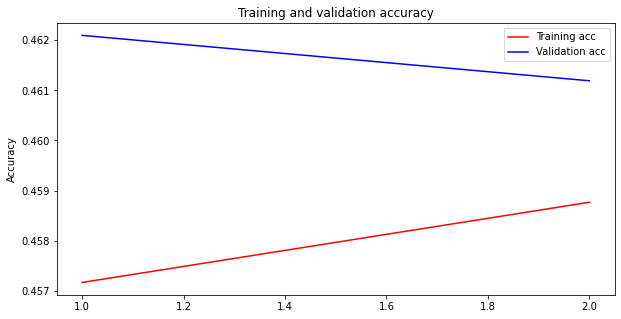

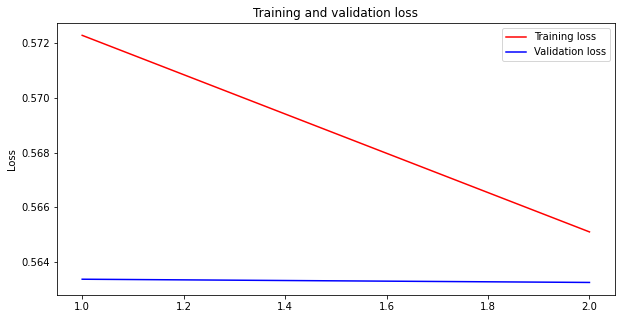

In [83]:
cus_model.draw_metrics("C:\\Users\\Cemal\Desktop\\bitirme tezi\\codes\\Classes\\acc.png","C:\\Users\\Cemal\Desktop\\bitirme tezi\\codes\\Classes\\loss.png")